In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set()

In [2]:
df = pd.read_csv('Iris.csv')
df = df.drop('Id', axis=1)
df['Species'] = df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = df['Species']
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Describing the features of data

df.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


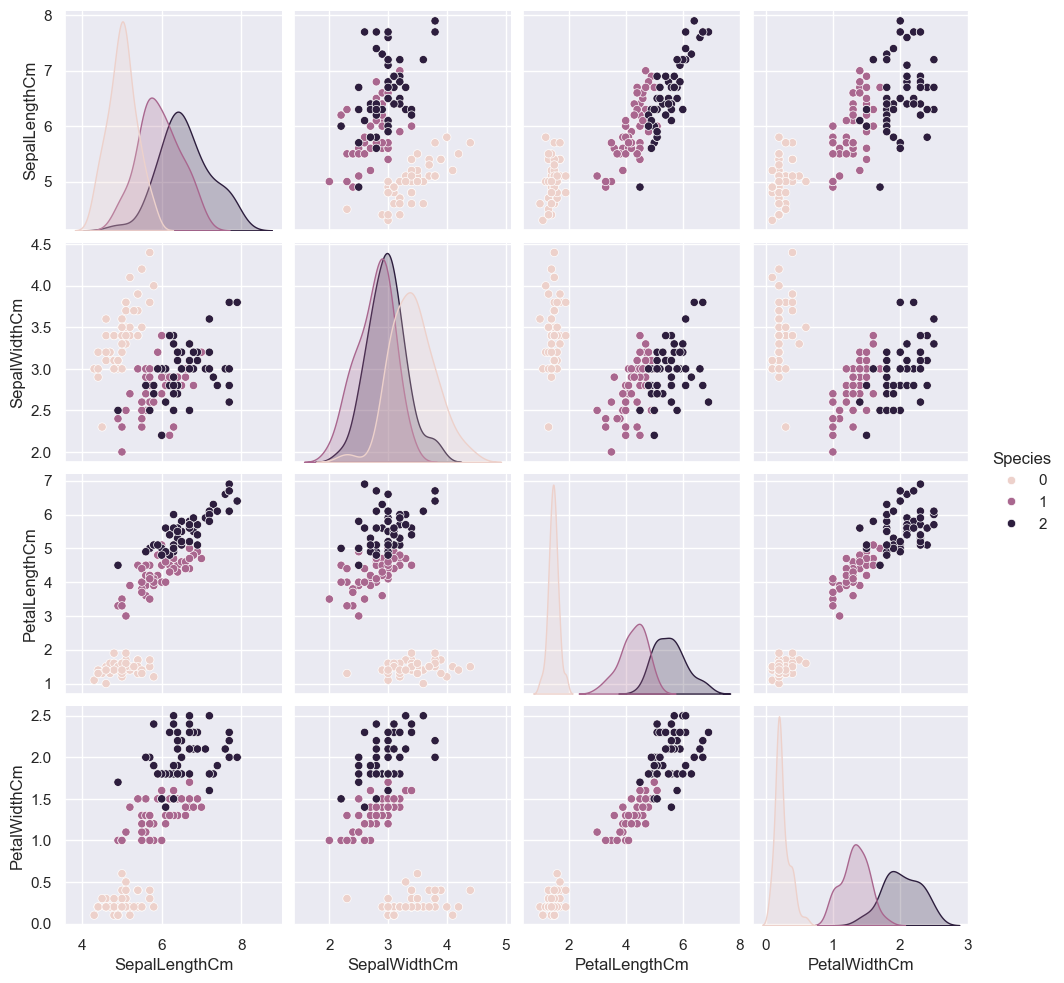

In [4]:
# Pairplotting to see relation among every Feature

sns.pairplot(data=df, hue='Species')

In [5]:
# Separating out the grapgh for Petal and Sepal

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=('Sepal', 'Petal'))
fig.add_trace(go.Scatter(x=df['SepalLengthCm'], y=df['SepalWidthCm'], mode='markers',
        marker=dict(color=df['Species'].astype('category').cat.codes),
        text=df['Species'],), row=1, col=1)
fig.add_trace(go.Scatter(x=df['PetalLengthCm'], y=df['PetalWidthCm'], mode='markers',
        marker=dict(color=df['Species'].astype('category').cat.codes, showscale=True),
        text=df['Species'],), row=1, col=2)
fig.update_layout(height=500, width=1000)
fig.show()

In [6]:
# Splitting data in training set and testing set 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=54)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [7]:
# Deploying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
score = accuracy_score(Y_pred, Y_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

In [8]:
# Score, Report

print(f'Accuracy Score of the Model is: {score} \nClassification Report is: \n{report}')

Accuracy Score of the Model is: 0.9333333333333333 
Classification Report is: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.85      1.00      0.92        11
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



Text(0.5, 1.0, 'Random Forest')

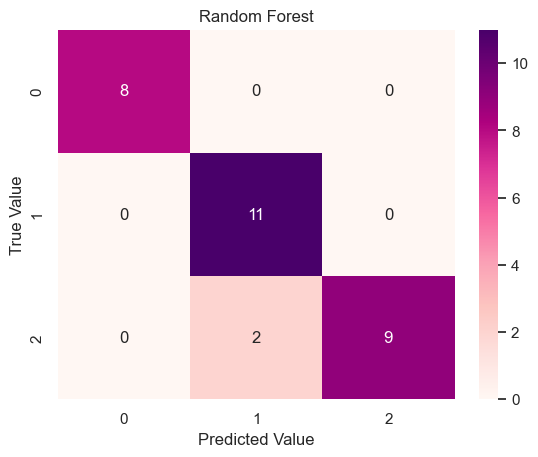

In [9]:
# PLotting Heat Map of the Confusion Matrix
conf_matrix_plot = sns.heatmap(conf_matrix, annot=True, cmap='RdPu')
conf_matrix_plot.set_xlabel('Predicted Value')
conf_matrix_plot.set_ylabel('True Value')
conf_matrix_plot.set_title('Random Forest')

In [10]:
# Predicting Value

pred = {
        'SepalLengthCm' : [4.0, 3.8, 6.3, 4.7],
        'SepalWidthCm' : [3.1, 2.3, 2.6, 2],
        'PetalLengthCm' : [1.1, 3.3, 5.5, 3.3],
        'PetalWidthCm' : [0.2, 1.5, 2.3, 1.3]
}
pred_df = pd.DataFrame(pred)
pred_val = rfc.predict(pred_df)
pred_df['Species'] = pred_val
pred_df['Species'] = pred_df['Species'].map({0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'})
print(f'The Predicted value for Random Data is: \n{pred_df}')

The Predicted value for Random Data is: 
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
0            4.0           3.1            1.1           0.2      Iris-setosa
1            3.8           2.3            3.3           1.5  Iris-versicolor
2            6.3           2.6            5.5           2.3   Iris-virginica
3            4.7           2.0            3.3           1.3  Iris-versicolor
